In [1]:
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.problems.second_quantization.electronic import ElectronicStructureProblem

from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.circuit.library import HartreeFock, UCC
from qiskit.algorithms.optimizers import COBYLA, CG, SLSQP, L_BFGS_B
from qiskit.algorithms import VQE
from qiskit_nature.algorithms.ground_state_solvers.minimum_eigensolver_factories import NumPyMinimumEigensolverFactory
from qiskit import Aer
import numpy as np 
from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister

import logging
logging.basicConfig(filename="H2_1.0.log", level=logging.INFO)
logger=logging.getLogger()
logger.setLevel(logging.DEBUG)

/tmp/ipykernel_87/3394221396.py:9: NatureDeprecationWarning: The qiskit_nature.algorithms.excited_state_solvers package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.algorithms.excited_state_solvers package.
  from qiskit_nature.algorithms.ground_state_solvers.minimum_eigensolver_factories import NumPyMinimumEigensolverFactory
/tmp/ipykernel_87/3394221396.py:9: NatureDeprecationWarning: The qiskit_nature.algorithms.pes_sampler package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release . Please refer to 'https://github.com/Qiskit/qiskit-nature/issues/750' for additional information regarding 'extrapolators'.
  from qiskit_nature.algorithms.ground_state_solvers.minimum_eigensolver_factories import NumPyMinimumEigensolverFactory


In [3]:
coord = 'H 0.0 0.0 0.0; H 0.0 0.0 0.735'
driver = PySCFDriver(atom=coord, charge=0, spin=0, basis='sto3g')
es_problem = ElectronicStructureProblem(driver)
print(es_problem)

# obtaining qubit Hamiltonian
mapper = JordanWignerMapper()
converter = QubitConverter(mapper=mapper, two_qubit_reduction=False)
second_q_op = es_problem.second_q_ops()
print(second_q_op['ElectronicEnergy'])
qubit_op = converter.convert(second_q_op['ElectronicEnergy'])
print(qubit_op)



overwrite output file: /tmp/tmpnm4dpz98.log
Fermionic Operator
register length=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ -0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ -0.0904 ...
-0.8105479805373275 * IIII
+ 0.17218393261915557 * IIIZ
- 0.2257534922240239 * IIZI
+ 0.17218393261915554 * IZII
- 0.22575349222402397 * ZIII
+ 0.12091263261776627 * IIZZ
+ 0.16892753870087907 * IZIZ
+ 0.04523279994605784 * YYYY
+ 0.04523279994605784 * XXYY
+ 0.04523279994605784 * YYXX
+ 0.04523279994605784 * XXXX
+ 0.16614543256382414 * ZIIZ
+ 0.16614543256382414 * IZZI
+ 0.17464343068300445 * ZIZI
+ 0.12091263261776627 * ZZII


Number Of Particles:  (1, 1)
Number of Spin Orbitals:  4
Nuclear Repulsion Energy:  0.7199689944489797


/tmp/ipykernel_87/3601721468.py:28: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  algorithm = VQE(ansatz,quantum_instance=backend)


HF Energy is -1.116998996754004
no of parameters 3
Excitation list is [((0,), (1,)), ((2,), (3,)), ((0, 2), (1, 3))]
     ┌───┐┌───────────────────────────────────┐»
q_0: ┤ X ├┤0                                  ├»
     └───┘│                                   │»
q_1: ─────┤1                                  ├»
     ┌───┐│  exp(-it (IIXY + IIYX))(1.0*t[0]) │»
q_2: ┤ X ├┤2                                  ├»
     └───┘│                                   │»
q_3: ─────┤3                                  ├»
          └───────────────────────────────────┘»
«     ┌───────────────────────────────────┐»
«q_0: ┤0                                  ├»
«     │                                   │»
«q_1: ┤1                                  ├»
«     │  exp(-it (XYII + YXII))(1.0*t[1]) │»
«q_2: ┤2                                  ├»
«     │                                   │»
«q_3: ┤3                                  ├»
«     └───────────────────────────────────┘»
«     ┌──────────────────────────────

/tmp/ipykernel_87/3601721468.py:52: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe1 = VQE(var_form, optimizer=optimizer, callback = store_intermediate_result, quantum_instance=backend)


VQE Optimized UCCSD Energy is -1.1373060275140134
overwrite output file: /tmp/tmpv6sqob7r.log


/tmp/ipykernel_87/3601721468.py:59: NatureDeprecationWarning: The qiskit_nature.algorithms.ground_state_solvers.GroundStateEigensolver class is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.algorithms.ground_state_solvers.GroundStateEigensolver class.
  calc = GroundStateEigensolver(converter, solver)


EXACT ENERGY:  -1.137306035753403


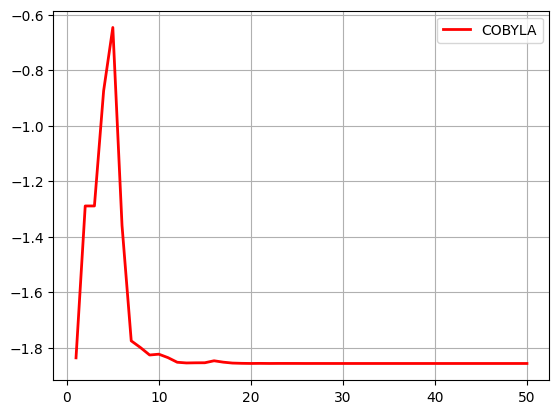

In [4]:
es_particle_number = es_problem.grouped_property_transformed.get_property('ParticleNumber')
num_particles = (es_particle_number.num_alpha, es_particle_number.num_beta)
num_spin_orbitals = es_particle_number.num_spin_orbitals
es_energy = es_problem.grouped_property_transformed.get_property('ElectronicEnergy')
#print(es_energy.electronic_energy)
nuclear_repulsion_energy = es_energy.nuclear_repulsion_energy
shift = nuclear_repulsion_energy
print('Number Of Particles: ',num_particles)
print('Number of Spin Orbitals: ', num_spin_orbitals)
print('Nuclear Repulsion Energy: ', nuclear_repulsion_energy)


# initialization of state
init_state = HartreeFock(num_spin_orbitals, num_particles, converter)

#optimizer = L_BFGS_B(maxfun=200000,maxiter=10000)
backend = Aer.get_backend('statevector_simulator')

#Create dummy parametrized circuit for HF calculation
theta = Parameter('a')
n = qubit_op.num_qubits
qc = QuantumCircuit(qubit_op.num_qubits)
qc.rz(theta*0,0)
ansatz = qc
ansatz.compose(init_state, front=True, inplace=True)

#Pass it through VQE
algorithm = VQE(ansatz,quantum_instance=backend)
result = algorithm.compute_minimum_eigenvalue(qubit_op).eigenvalue
print('HF Energy is',np.real(result)+shift)

# Variational ansatz formation
var_form = UCC(num_particles=num_particles,num_spin_orbitals=num_spin_orbitals, excitations='sd', initial_state=init_state, qubit_converter=converter)
excitation_list = var_form._get_excitation_list()
print('no of parameters',var_form.num_parameters)
print('Excitation list is',excitation_list)
circuit = var_form.decompose()
print(circuit)


backend = Aer.get_backend('statevector_simulator')

optimizer = COBYLA(maxiter=10000)

counts = list()
values = list()
def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

#VQE optimization
vqe1 = VQE(var_form, optimizer=optimizer, callback = store_intermediate_result, quantum_instance=backend)
vqe_result = vqe1.compute_minimum_eigenvalue(qubit_op)
E1 = np.real(vqe_result.eigenvalue)+shift
print('VQE Optimized UCCSD Energy is',E1)

# NumPyMinimumEigensolver (FCI Energy)
solver = NumPyMinimumEigensolverFactory()
calc = GroundStateEigensolver(converter, solver)
numpy_result = calc.solve(es_problem)
exact_energy = np.real(numpy_result.eigenenergies[0]) + shift
print('EXACT ENERGY: ', exact_energy)

# plot the convergence pattern
import matplotlib.pyplot as plt

plt.plot(counts,values,c='r',linewidth=2,label='COBYLA')
plt.legend()
plt.grid()
#plt.show()

#plt.savefig('H2_Con.png',dpi=600)
plt.show()